In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('4-Algerian_forest_fires_dataset.csv')

In [5]:
# data -> https://www.kaggle.com/datasets/nitinchoudhary012/algerian-forest-fires-dataset

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.drop(122,inplace=True)

In [8]:
df.loc[:123,"Region"] = 0

In [9]:
df.loc[123:, "Region"] = 1

In [10]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [15]:
df["Temperature"].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', 'Temperature', '38', '39', '40', '42'],
      dtype=object)

In [16]:
df[df["Temperature"] == 'Temperature']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [17]:
df.drop(122,inplace = True)

In [18]:
df["Temperature"] = df["Temperature"].astype(float)

In [19]:
df = df.apply(pd.to_numeric, errors='ignore')

/var/folders/2z/xs3bm4js3jn6l5zn5xw8k2pw0000gn/T/ipykernel_46485/1277559549.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(9), int64(5), object(1)
memory usage: 30.4+ KB


In [21]:
df[115:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,9,2012,29.0,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0.0
116,25,9,2012,26.0,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,not fire,0.0
117,26,9,2012,31.0,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0.0
118,27,9,2012,31.0,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0.0
119,28,9,2012,32.0,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,9,2012,26.0,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0.0
121,30,9,2012,25.0,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0.0
123,1,6,2012,32.0,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
124,2,6,2012,30.0,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
125,3,6,2012,29.0,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [23]:
df.columns = df.columns.str.strip()

In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [26]:
df['Classes'] = df['Classes'].str.strip()

In [27]:
df["Classes"] = np.where(df["Classes"] == "not fire",0,1)

In [28]:
df["Classes"].value_counts(normalize=True)*100

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

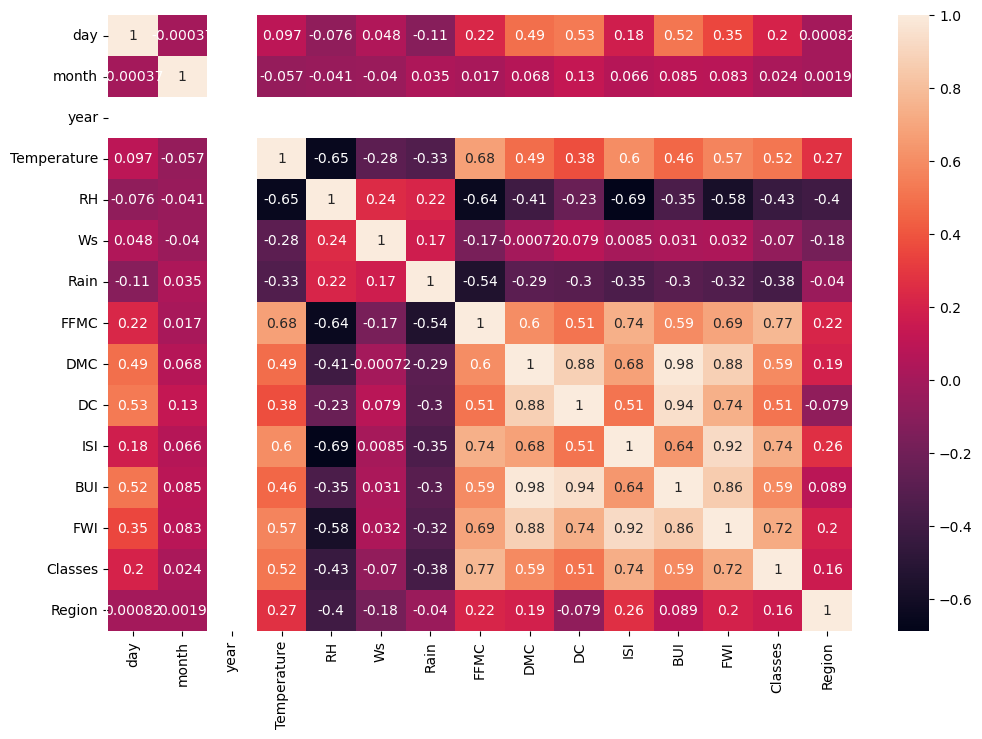

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
df.drop(["day", "month", "year"], axis = 1, inplace=True)

In [31]:
# dependent & independent features

In [32]:
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 15)

In [35]:
X_test.shape

(61, 11)

In [36]:
#redundancy, multicollinearity, overfitting

In [37]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [56]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [54]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])> threshold:
                print(corr.iloc[i,j])
                print(corr.columns[i])
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [58]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

0.8713871111893419
DC
0.9806462836615817
BUI
0.9392483336299187
BUI


In [59]:
X_train.drop(columns_dropping, axis=1, inplace=True)
X_test.drop(columns_dropping, axis=1, inplace=True)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

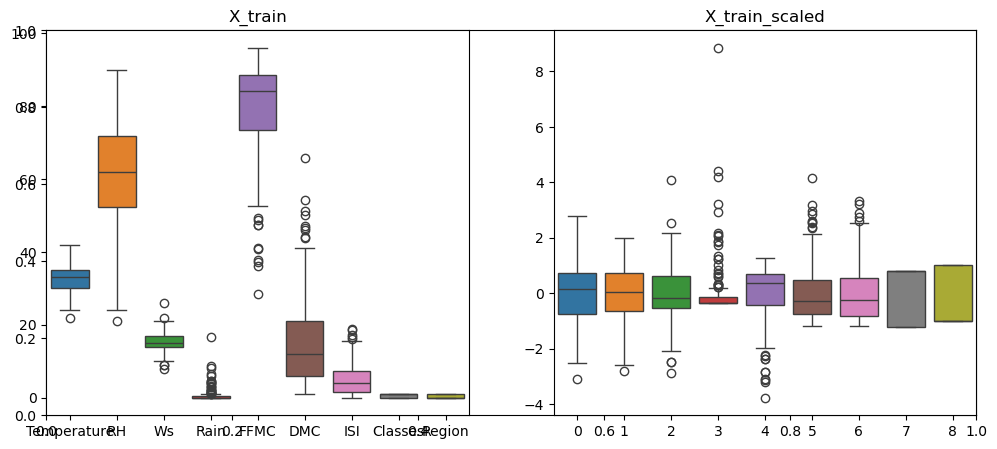

In [65]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [84]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

MAE: 0.7036011729575921
MSE 0.876416369860599
R2 Score: 0.9838729275348057


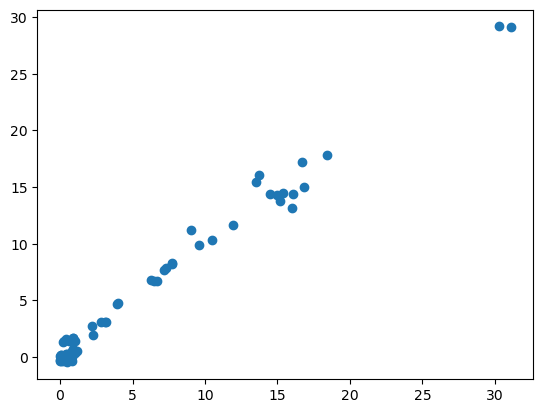

In [85]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

MAE: 1.2162726338006287
MSE 2.602937736813218
R2 Score: 0.9521029422229386


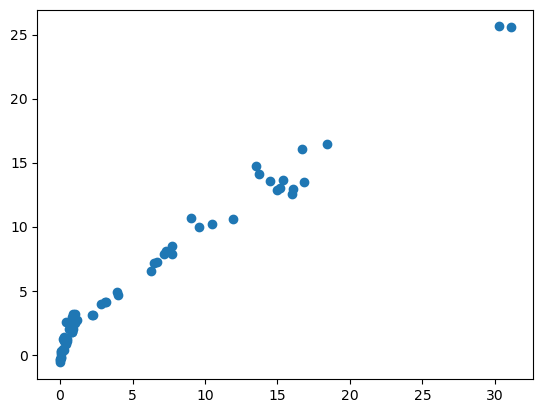

In [86]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

MAE: 0.7093542448703323
MSE 0.8868348464263087
R2 Score: 0.9836812155445575


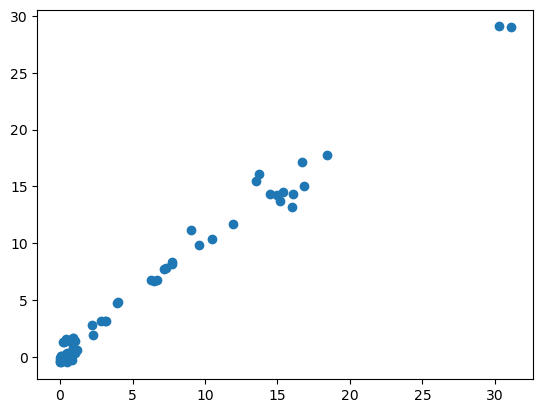

In [87]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

MAE: 1.749328647109016
MSE 5.569160502382826
R2 Score: 0.8975210207375391


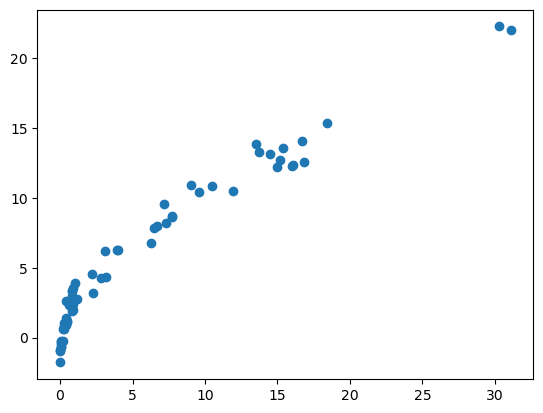

In [88]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [90]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [89]:
# lasso cross-validation

MAE: 0.7222308156305418
MSE 0.897201167029363
R2 Score: 0.9834904632842026


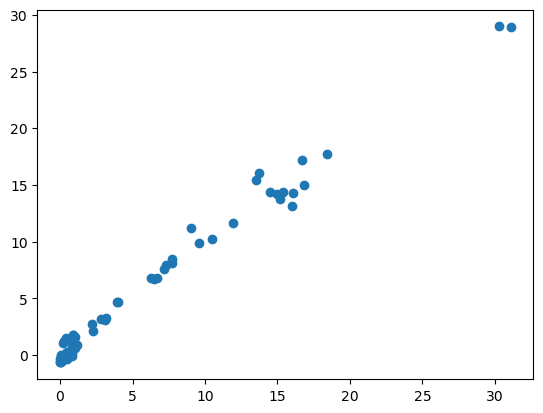

In [91]:
lassocv = LassoCV()
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [92]:
# ridge cross-validation

MAE: 0.7093542448697655
MSE 0.8868348464268654
R2 Score: 0.9836812155445472


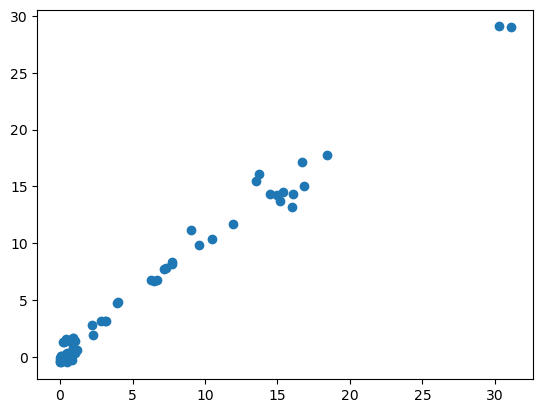

In [93]:
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [94]:
# elasticnet cross-validation

MAE: 0.7354284604918176
MSE 0.9249125778630376
R2 Score: 0.9829805413498388


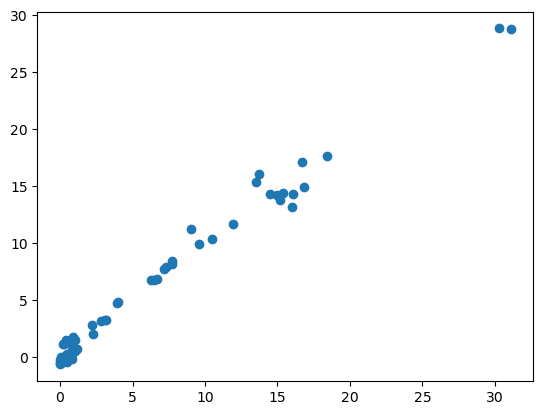

In [95]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE:",mae)
print("MSE",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [96]:
elasticnetcv.alpha_

np.float64(0.025472347707234465)

In [97]:
elasticnetcv.alphas_

array([13.59382584, 12.67764748, 11.82321647, 11.02637125, 10.28323073,
        9.5901754 ,  8.94382967,  8.34104549,  7.77888694,  7.25461599,
        6.76567915,  6.30969502,  5.8844427 ,  5.48785095,  5.11798817,
        4.77305289,  4.4513651 ,  4.15135799,  3.87157036,  3.61063947,
        3.36729446,  3.14035008,  2.928701  ,  2.73131635,  2.54723477,
        2.37555967,  2.2154549 ,  2.06614066,  1.92688969,  1.79702377,
        1.67591039,  1.56295964,  1.45762139,  1.35938258,  1.26776475,
        1.18232165,  1.10263712,  1.02832307,  0.95901754,  0.89438297,
        0.83410455,  0.77788869,  0.7254616 ,  0.67656792,  0.6309695 ,
        0.58844427,  0.5487851 ,  0.51179882,  0.47730529,  0.44513651,
        0.4151358 ,  0.38715704,  0.36106395,  0.33672945,  0.31403501,
        0.2928701 ,  0.27313164,  0.25472348,  0.23755597,  0.22154549,
        0.20661407,  0.19268897,  0.17970238,  0.16759104,  0.15629596,
        0.14576214,  0.13593826,  0.12677647,  0.11823216,  0.11